# Poisson modeling using GARCH models

In [1]:
from arch import arch_model
from src.poisson import Poisson

p = Poisson()
a1 = p.generate(14)
am = arch_model(a1, vol='Garch', p=1, o=0, q=1, dist='Normal')
res = am.fit(update_freq=5)
forecasts = res.forecast()
print(forecasts.mean.iloc[-1][0])


Iteration:      5,   Func. Count:     32,   Neg. LLF: 988.074210965
Iteration:     10,   Func. Count:     62,   Neg. LLF: 985.651872814
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 985.651724545
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12
6.23435322631


In [5]:
import math
import numpy
import matplotlib.pyplot as plt
from src.poisson import Poisson
from src.garch import GARCH
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Example of our Poisson process

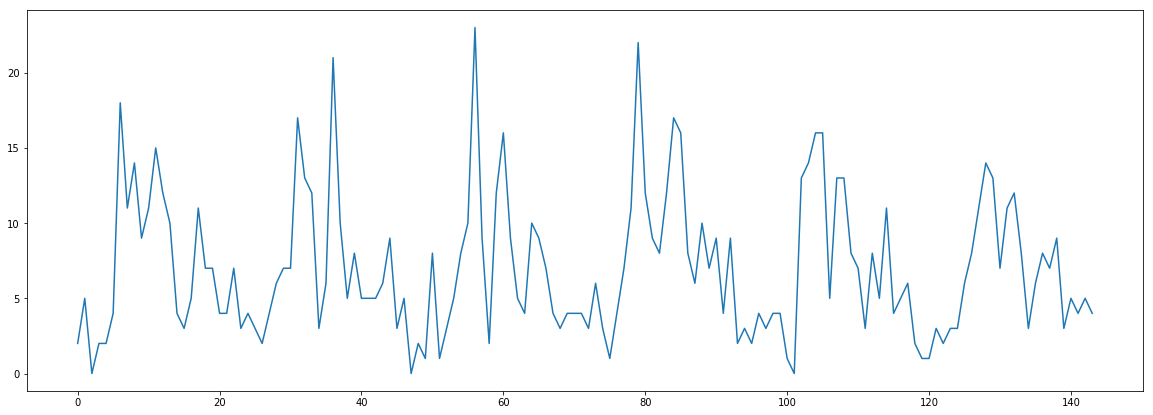

In [3]:
p = Poisson()
example = p.generate(6)

plt.figure(figsize=(20,7))
plt.plot(example)

### Apply the ARIMA model to a new data set that is more varied

In [6]:
a1 = p.generate(14)
a2 = p.generate(3,2)
a3 = p.generate(8)
a4 = p.generate(2,2)
actual = numpy.concatenate((a1,a2,a3,a4))

garch = GARCH()
pred = garch.predict(actual)

AttributeError: 'GARCH' object has no attribute '_GARCH__create_arima_dataset'

### Plot the prediction

In [ ]:
actual = actual[95:-2]
error = math.sqrt(mean_squared_error(pred, actual))

plt.figure(figsize=(20,7))
plt.title('RMSE: {:.2f}'.format(error))
plt.plot(actual)
plt.plot(pred)

### Evaluate the residual

In [ ]:
residual = []
for i in range(len(actual)):
    val = actual[i] - pred[i][0]
    residual.append(val)

plt.figure(figsize=(20,7))
plt.plot(residual)

### General results

